In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Lorenz system and RK4 integrator ----------
def lorenz(x, y, z, sigma=10.0, rho=28.0, beta=8.0/3.0):
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return dx, dy, dz

def rk4_step(state, dt, f):
    x, y, z = state
    k1 = np.array(f(*state))
    k2 = np.array(f(*(state + 0.5 * dt * k1)))
    k3 = np.array(f(*(state + 0.5 * dt * k2)))
    k4 = np.array(f(*(state + dt * k3)))
    return state + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

def simulate_lorenz(n_steps=12000, dt=0.01, init_state=(1.0, 1.0, 1.0)):
    traj = np.empty((n_steps, 3), dtype=float)
    state = np.array(init_state, dtype=float)
    # small burn-in so the attractor shape is cleaner
    for _ in range(200):
        state = rk4_step(state, dt, lorenz)
    for i in range(n_steps):
        traj[i] = state
        state = rk4_step(state, dt, lorenz)
    return traj

traj = simulate_lorenz()
x, y, z = traj[:,0], traj[:,1], traj[:,2]

# ---------- Minimal "despine" helpers for a clean look ----------
def _despine_3d(ax):
    ax.grid(False)
    ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
    ax.xaxis.pane.set_visible(False)
    ax.yaxis.pane.set_visible(False)
    ax.zaxis.pane.set_visible(False)
    for spine in ax.spines.values():
        spine.set_visible(False)

def _despine_2d(ax):
    ax.grid(False)
    ax.set_xticks([]); ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)


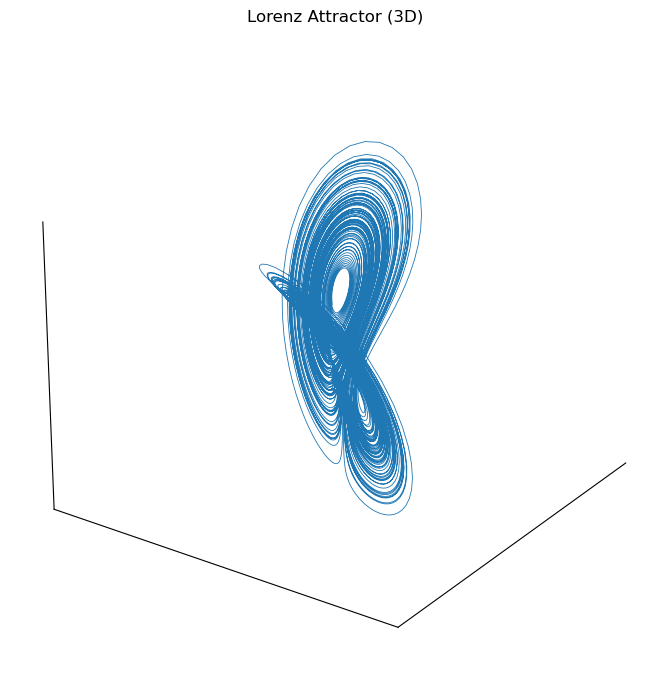

In [7]:
from mpl_toolkits.mplot3d import Axes3D  # required for 3D projection

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, linewidth=0.6)
ax.view_init(elev=25, azim=35)
ax.set_title("Lorenz Attractor (3D)")
_despine_3d(ax)
fig.tight_layout()
# Optional save:
# fig.savefig("lorenz_3d.png", dpi=220)
plt.show()


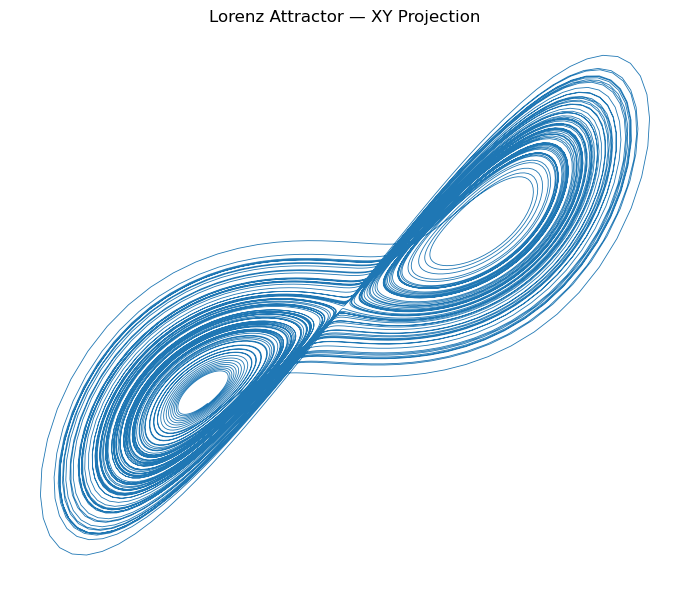

In [8]:
fig_xy = plt.figure(figsize=(7, 6))
ax_xy = fig_xy.add_subplot(111)
ax_xy.plot(x, y, linewidth=0.6)
ax_xy.set_title("Lorenz Attractor — XY Projection")
_despine_2d(ax_xy)
fig_xy.tight_layout()
# Optional save:
# fig_xy.savefig("lorenz_xy.png", dpi=220)
plt.show()


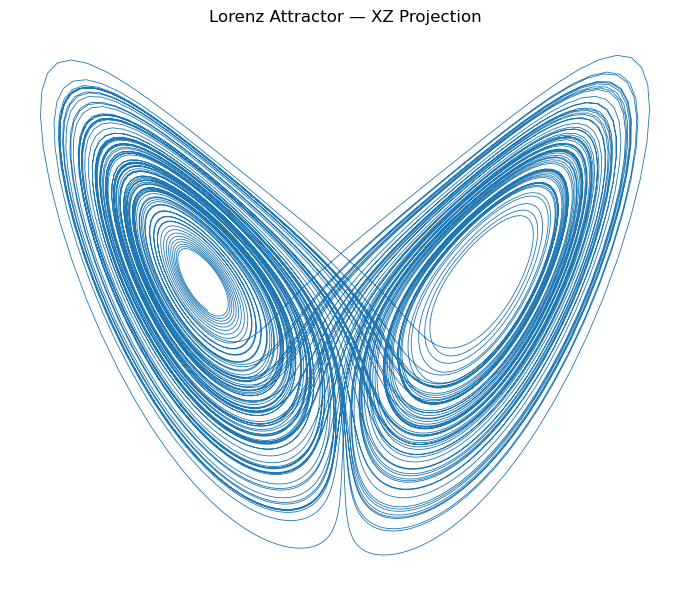

In [9]:
fig_xz = plt.figure(figsize=(7, 6))
ax_xz = fig_xz.add_subplot(111)
ax_xz.plot(x, z, linewidth=0.6)
ax_xz.set_title("Lorenz Attractor — XZ Projection")
_despine_2d(ax_xz)
fig_xz.tight_layout()
# Optional save:
# fig_xz.savefig("lorenz_xz.png", dpi=220)
plt.show()


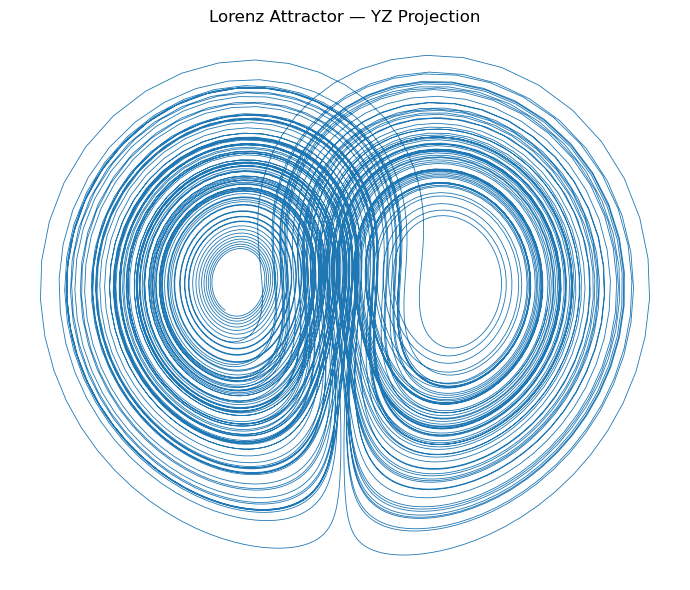

In [10]:
fig_yz = plt.figure(figsize=(7, 6))
ax_yz = fig_yz.add_subplot(111)
ax_yz.plot(y, z, linewidth=0.6)
ax_yz.set_title("Lorenz Attractor — YZ Projection")
_despine_2d(ax_yz)
fig_yz.tight_layout()
# Optional save:
# fig_yz.savefig("lorenz_yz.png", dpi=220)
plt.show()
